# Project 1: Task III

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
import scipy.stats as stats


In [2]:
# Load datasets
KV_X_0 = pd.read_csv('../dataset/2025_JNSM_KV_flashcrowd_2/JNSM_KV_flashcrowd_2/X.csv')  
KV_Y = pd.read_csv('../dataset/2025_JNSM_KV_flashcrowd_2/JNSM_KV_flashcrowd_2/Y.csv')   

VoD_X_0 = pd.read_csv('../dataset/2025_JNSM_VoD_flashcrowd_2/JNSM_VoD_flashcrowd_2/X.csv')  
VoD_Y = pd.read_csv('../dataset/2025_JNSM_VoD_flashcrowd_2/JNSM_VoD_flashcrowd_2/Y.csv')   

# Drop unnecessary columns
KV_X_0 = KV_X_0.drop(columns=['Unnamed: 0', 'TimeStamp'])
VoD_X_0 = VoD_X_0.drop(columns=['Unnamed: 0', 'TimeStamp'])

KV_target_column = 'ReadsAvg'  
KV_Y_target = KV_Y[KV_target_column].values

VoD_target_column = 'DispFrames'  
VoD_Y_target = VoD_Y[VoD_target_column].values

In [3]:
# (a) l2 Normalization
# X_1: l2-norm=1 for each feature column
# axis=0 operates on columns
KV_X_1 = normalize(KV_X_0, norm='l2', axis=0)

# X_2: l2-norm=1 for each sample row
# axis=1 operates on rows
KV_X_2 = normalize(KV_X_0, norm='l2', axis=1)

# (b) Restriction to interval [0, 1] [cite: 41]
# X_3: Min-max scaling on feature columns
# This is the default behavior of MinMaxScaler
KV_X_3 = MinMaxScaler().fit_transform(KV_X_0)

# X_4: Min-max scaling on sample rows
# We can transpose, scale columns (which are now rows), and transpose back
KV_X_4 = MinMaxScaler().fit_transform(KV_X_0.T).T

# (c) Standardization [cite: 42]
# X_5: Standardization (0 mean, 1 var) on feature columns
# This is the default behavior of StandardScaler
KV_X_5 = StandardScaler().fit_transform(KV_X_0)

# X_6: Standardization (0 mean, 1 var) on sample rows
# We transpose, scale columns (which are now rows), and transpose back
KV_X_6 = StandardScaler().fit_transform(KV_X_0.T).T

# Optional: Verification of one sample/feature
print("\nVerification (value for first feature/sample):")
print(f"  X_1 col norm (should be 1.0): {np.linalg.norm(KV_X_1[:, 0]):.3f}")
print(f"  X_2 row norm (should be 1.0): {np.linalg.norm(KV_X_2[0, :]):.3f}")
print(f"  X_3 col min/max (should be ~0/1): {np.min(KV_X_3[:, 0]):.3f}/{np.max(KV_X_3[:, 0]):.3f}")
print(f"  X_4 row min/max (should be ~0/1): {np.min(KV_X_4[0, :]):.3f}/{np.max(KV_X_4[0, :]):.3f}")
print(f"  X_5 col mean/std (should be ~0/1): {np.mean(KV_X_5[:, 0]):.3f}/{np.std(KV_X_5[:, 0]):.3f}")
print(f"  X_6 row mean/std (should be ~0/1): {np.mean(KV_X_6[0, :]):.3f}/{np.std(KV_X_6[0, :]):.3f}")


Verification (value for first feature/sample):
  X_1 col norm (should be 1.0): 1.000
  X_2 row norm (should be 1.0): 1.000
  X_3 col min/max (should be ~0/1): 0.000/1.000
  X_4 row min/max (should be ~0/1): 0.000/1.000
  X_5 col mean/std (should be ~0/1): -0.000/1.000
  X_6 row mean/std (should be ~0/1): -0.000/1.000


In [4]:
# (a) l2 Normalization
# X_1: l2-norm=1 for each feature column
# axis=0 operates on columns
VoD_X_1 = normalize(VoD_X_0, norm='l2', axis=0)

# X_2: l2-norm=1 for each sample row
# axis=1 operates on rows
VoD_X_2 = normalize(VoD_X_0, norm='l2', axis=1)

# (b) Restriction to interval [0, 1] [cite: 41]
# X_3: Min-max scaling on feature columns
# This is the default behavior of MinMaxScaler
VoD_X_3 = MinMaxScaler().fit_transform(VoD_X_0)

# X_4: Min-max scaling on sample rows
# We can transpose, scale columns (which are now rows), and transpose back
VoD_X_4 = MinMaxScaler().fit_transform(VoD_X_0.T).T

# (c) Standardization [cite: 42]
# X_5: Standardization (0 mean, 1 var) on feature columns
# This is the default behavior of StandardScaler
VoD_X_5 = StandardScaler().fit_transform(VoD_X_0)

# X_6: Standardization (0 mean, 1 var) on sample rows
# We transpose, scale columns (which are now rows), and transpose back
VoD_X_6 = StandardScaler().fit_transform(VoD_X_0.T).T

# Optional: Verification of one sample/feature
print("\nVerification (value for first feature/sample):")
print(f"  X_1 col norm (should be 1.0): {np.linalg.norm(VoD_X_1[:, 0]):.3f}")
print(f"  X_2 row norm (should be 1.0): {np.linalg.norm(VoD_X_2[0, :]):.3f}")
print(f"  X_3 col min/max (should be ~0/1): {np.min(VoD_X_3[:, 0]):.3f}/{np.max(VoD_X_3[:, 0]):.3f}")
print(f"  X_4 row min/max (should be ~0/1): {np.min(VoD_X_4[0, :]):.3f}/{np.max(VoD_X_4[0, :]):.3f}")
print(f"  X_5 col mean/std (should be ~0/1): {np.mean(VoD_X_5[:, 0]):.3f}/{np.std(VoD_X_5[:, 0]):.3f}")
print(f"  X_6 row mean/std (should be ~0/1): {np.mean(VoD_X_6[0, :]):.3f}/{np.std(VoD_X_6[0, :]):.3f}")


Verification (value for first feature/sample):
  X_1 col norm (should be 1.0): 1.000
  X_2 row norm (should be 1.0): 1.000
  X_3 col min/max (should be ~0/1): 0.000/1.000
  X_4 row min/max (should be ~0/1): 0.000/1.000
  X_5 col mean/std (should be ~0/1): 0.000/1.000
  X_6 row mean/std (should be ~0/1): 0.000/1.000


In [5]:
# Function to compute NMAE
def compute_nmae(y_true, y_pred):
    y_mean = np.mean(y_true)
    eps = 1e-12 if abs(y_mean) < 1e-12 else 0.0
    return mean_absolute_error(y_true, y_pred) / (y_mean + eps)

In [6]:
KV_mats = {
    "X0_Raw":        KV_X_0,
    "X1_L2_Col":     KV_X_1,
    "X2_L2_Row":     KV_X_2,
    "X3_MinMax_Col": KV_X_3,
    "X4_MinMax_Row": KV_X_4,
    "X5_Std_Col":    KV_X_5,
    "X6_Std_Row":    KV_X_6
}

VoD_mats = {
    "X0_Raw":        VoD_X_0,
    "X1_L2_Col":     VoD_X_1,
    "X2_L2_Row":     VoD_X_2,
    "X3_MinMax_Col": VoD_X_3,
    "X4_MinMax_Row": VoD_X_4,
    "X5_Std_Col":    VoD_X_5,
    "X6_Std_Row":    VoD_X_6
}

datasets = {
    "KV":  {"matrices": KV_mats,  "target": KV_Y_target},
    "VoD": {"matrices": VoD_mats, "target": VoD_Y_target},
}

In [7]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, 
                                           n_estimators=50,
                                           max_features=20,
                                           n_jobs=-1) 
}

In [8]:
# Dataset: KV

#  Processing X0_Raw of KV
#     - Linear Regression NMAE: 56308.570
#     - Random Forest NMAE: 0.018

#  Processing X1_L2_Col of KV
#     - Linear Regression NMAE: 9257.562
#     - Random Forest NMAE: 0.018

#  Processing X2_L2_Row of KV
#     - Linear Regression NMAE: 133354.795
#     - Random Forest NMAE: 0.018

#  Processing X3_MinMax_Col of KV
#     - Linear Regression NMAE: 242.044
#     - Random Forest NMAE: 0.018

#  Processing X4_MinMax_Row of KV
#     - Linear Regression NMAE: 39926.404
#     - Random Forest NMAE: 0.019

#  Processing X5_Std_Col of KV
#     - Linear Regression NMAE: 9257.470
#     - Random Forest NMAE: 0.018

#  Processing X6_Std_Row of KV
#     - Linear Regression NMAE: 131317.940
#     - Random Forest NMAE: 0.021

#  Dataset: VoD

#  Processing X0_Raw of VoD
#     - Linear Regression NMAE: 0.127
#     - Random Forest NMAE: 0.083

#  Processing X1_L2_Col of VoD
#     - Linear Regression NMAE: 0.122
#     - Random Forest NMAE: 0.083

#  Processing X2_L2_Row of VoD
#     - Linear Regression NMAE: 0.128
#     - Random Forest NMAE: 0.086

#  Processing X3_MinMax_Col of VoD
#     - Linear Regression NMAE: 0.123
#     - Random Forest NMAE: 0.083

#  Processing X4_MinMax_Row of VoD
#     - Linear Regression NMAE: 0.129
#     - Random Forest NMAE: 0.088

#  Processing X5_Std_Col of VoD
#     - Linear Regression NMAE: 0.122
#     - Random Forest NMAE: 0.083

#  Processing X6_Std_Row of VoD
#     - Linear Regression NMAE: 0.124
#     - Random Forest NMAE: 0.087

# ...Evaluation complete.

In [9]:
results = []
# Linear Regression for 6 preprocessing methods
for dataset_name, matrics_target in datasets.items():
    print(f"\n Dataset: {dataset_name}")
    matrices = matrics_target["matrices"]
    target = matrics_target["target"]
    for matrix_name, matrix in matrices.items():
        print(f"\n Processing {matrix_name} of {dataset_name}")
        X_train, X_test, y_train, y_test = train_test_split(
            matrix, target, test_size=0.3, random_state=42
        )
        for model_name, model in models.items():
            
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            nmae = compute_nmae(y_test, y_pred)
            results.append({
                "Dataset": dataset_name, # <-- Important new field
                "Matrix": matrix_name,
                "Model": model_name,
                "NMAE": nmae
            })
            
            print(f"    - {model_name} NMAE: {nmae:.3g}")

print("\n...Evaluation complete.")


 Dataset: KV

 Processing X0_Raw of KV
    - Linear Regression NMAE: 5.63e+04
    - Random Forest NMAE: 0.0181

 Processing X1_L2_Col of KV
    - Linear Regression NMAE: 9.26e+03
    - Random Forest NMAE: 0.0181

 Processing X2_L2_Row of KV
    - Linear Regression NMAE: 1.33e+05
    - Random Forest NMAE: 0.0182

 Processing X3_MinMax_Col of KV
    - Linear Regression NMAE: 242
    - Random Forest NMAE: 0.0182

 Processing X4_MinMax_Row of KV
    - Linear Regression NMAE: 3.99e+04
    - Random Forest NMAE: 0.0192

 Processing X5_Std_Col of KV
    - Linear Regression NMAE: 9.26e+03
    - Random Forest NMAE: 0.0182

 Processing X6_Std_Row of KV
    - Linear Regression NMAE: 1.31e+05
    - Random Forest NMAE: 0.0206

 Dataset: VoD

 Processing X0_Raw of VoD
    - Linear Regression NMAE: 0.127
    - Random Forest NMAE: 0.0869

 Processing X1_L2_Col of VoD
    - Linear Regression NMAE: 0.122
    - Random Forest NMAE: 0.0871

 Processing X2_L2_Row of VoD
    - Linear Regression NMAE: 0.128
 

In [10]:
results_df = pd.DataFrame(results)
print(f"\n{dataset_name} Dataset - Preprocessing Methods Comparison (NMAE):")
print(results_df.to_string())


VoD Dataset - Preprocessing Methods Comparison (NMAE):
   Dataset         Matrix              Model           NMAE
0       KV         X0_Raw  Linear Regression   56308.569669
1       KV         X0_Raw      Random Forest       0.018073
2       KV      X1_L2_Col  Linear Regression    9257.562362
3       KV      X1_L2_Col      Random Forest       0.018087
4       KV      X2_L2_Row  Linear Regression  133354.795078
5       KV      X2_L2_Row      Random Forest       0.018210
6       KV  X3_MinMax_Col  Linear Regression     242.044198
7       KV  X3_MinMax_Col      Random Forest       0.018181
8       KV  X4_MinMax_Row  Linear Regression   39926.403673
9       KV  X4_MinMax_Row      Random Forest       0.019249
10      KV     X5_Std_Col  Linear Regression    9257.470476
11      KV     X5_Std_Col      Random Forest       0.018220
12      KV     X6_Std_Row  Linear Regression  131317.939808
13      KV     X6_Std_Row      Random Forest       0.020635
14     VoD         X0_Raw  Linear Regression


 Count the outliers in dataset: KV

 Count the outliers in dataset: VoD
  dataset_name  threshold  num_outliers
0           KV          5          6844
1           KV          6          4950
2           KV          7          4260
3           KV          8          3376
4           KV          9          2854

KV Dataset: Total samples = 9722
VoD Dataset: Total samples = 18317


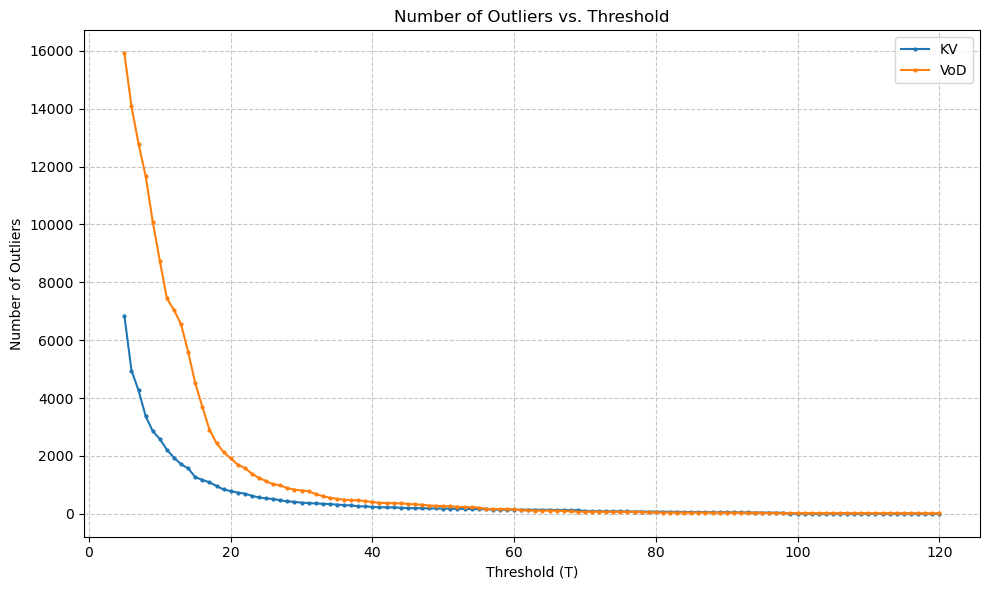

In [11]:
threshold_range = range (5, 121)
outlier_counts = []

for dataset_name, matrics_target in datasets.items():
    print(f"\n Count the outliers in dataset: {dataset_name}")
    matrices = matrics_target["matrices"]
    for T in threshold_range:
        # Count samples where ANY feature has absolute value > T
        outlier_mask = np.any(np.abs(matrices["X5_Std_Col"]) > T, axis=1)
        num_outliers = np.sum(outlier_mask)
        outlier_counts.append({
            "dataset_name":dataset_name,
            "threshold": T,
            "num_outliers":num_outliers})
# Convert your list of dicts into a DataFrame
outlier_df = pd.DataFrame(outlier_counts)

# Preview
print(outlier_df.head())
# Plot outlier counts
fig, ax = plt.subplots(figsize=(10, 6))

# 2. Loop through each unique dataset name and plot its data
for dataset_name in outlier_df['dataset_name'].unique():
    # Filter the DataFrame for the current dataset
    dataset_data = outlier_df[outlier_df['dataset_name'] == dataset_name]
    
    # 3. Plot the threshold vs. num_outliers for this dataset
    ax.plot(
        dataset_data['threshold'], 
        dataset_data['num_outliers'], 
        label=dataset_name, 
        marker='.', # Add small markers for data points
        markersize=4,
        linestyle='-'
    )

# 4. Customize the plot
ax.set_title('Number of Outliers vs. Threshold')
ax.set_xlabel('Threshold (T)')
ax.set_ylabel('Number of Outliers')

# 5. Add a legend to identify the datasets
ax.legend()

# Add a grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Ensure layout is tight
plt.tight_layout()

# 6. Save the plot to a file
plot_filename = 'outlier_threshold_plot.png'
plt.savefig(plot_filename)

print(f"\nKV Dataset: Total samples = {KV_X_5.shape[0]}")
print(f"VoD Dataset: Total samples = {VoD_X_5.shape[0]}")


In [12]:
#  Remove the outliers in dataset: KV
#     - T: 10
#         - Linear Regression NMAE: 0.025
#         - Random Forest NMAE: 0.017
#     - T: 20
#         - Linear Regression NMAE: 0.023
#         - Random Forest NMAE: 0.017
#     - T: 30
#         - Linear Regression NMAE: 0.024
#         - Random Forest NMAE: 0.018
#     - T: 40
#         - Linear Regression NMAE: 0.031
#         - Random Forest NMAE: 0.018
#     - T: 50
#         - Linear Regression NMAE: 0.094
#         - Random Forest NMAE: 0.018
#     - T: 60
#         - Linear Regression NMAE: 0.046
#         - Random Forest NMAE: 0.018
#     - T: 70
#         - Linear Regression NMAE: 20203.126
#         - Random Forest NMAE: 0.018
#     - T: 80
#         - Linear Regression NMAE: 0.033
#         - Random Forest NMAE: 0.018
#     - T: 90
#         - Linear Regression NMAE: 0.038
#         - Random Forest NMAE: 0.018
#     - T: 100
#         - Linear Regression NMAE: 9257.470
#         - Random Forest NMAE: 0.018

#  Remove the outliers in dataset: VoD
#     - T: 10
#         - Linear Regression NMAE: 0.143
#         - Random Forest NMAE: 0.089
#     - T: 20
#         - Linear Regression NMAE: 5.574
#         - Random Forest NMAE: 0.088
#     - T: 30
#         - Linear Regression NMAE: 0.134
#         - Random Forest NMAE: 0.086
#     - T: 40
#         - Linear Regression NMAE: 0.195
#         - Random Forest NMAE: 0.082
#     - T: 50
#         - Linear Regression NMAE: 0.145
#         - Random Forest NMAE: 0.085
#     - T: 60
#         - Linear Regression NMAE: 0.270
#         - Random Forest NMAE: 0.083
#     - T: 70
#         - Linear Regression NMAE: 0.177
#         - Random Forest NMAE: 0.083
#     - T: 80
#         - Linear Regression NMAE: 0.577
#         - Random Forest NMAE: 0.085
#     - T: 90
#         - Linear Regression NMAE: 0.153
#         - Random Forest NMAE: 0.085
#     - T: 100
#         - Linear Regression NMAE: 0.607
#         - Random Forest NMAE: 0.085

In [13]:
# Create 10 datasets with outliers removed for T=10, 20, 30, ..., 80, 90, 100

threshold_range_step10 = range(10,101,10)
results_removed = []
for dataset_name, matrics_target in datasets.items():
    print(f"\n Remove the outliers in dataset: {dataset_name}")
    matrices = matrics_target["matrices"]
    X5 = matrices["X5_Std_Col"]
    Y_target = matrics_target["target"]

    for T in threshold_range_step10:
        print (f'    - T: {T}')
        # Count samples where ANY feature has absolute value > T
        outlier_mask = np.any(np.abs(X5) > T, axis=1)
        valid_mask = ~outlier_mask
        
        X_filtered = X5[valid_mask]
        Y_filtered = Y_target[valid_mask]

        X_train, X_test, y_train, y_test = train_test_split(
            X_filtered, Y_filtered, test_size=0.3, random_state=42
        )
        for model_name, model in models.items():
            
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            nmae = compute_nmae(y_test, y_pred)
            results_removed.append({
                "Dataset": dataset_name, 
                "Model": model_name,
                "Threshold": T,
                "NMAE": nmae
            })
            
            print(f"        - {model_name} NMAE: {nmae:.3g}")


 Remove the outliers in dataset: KV
    - T: 10
        - Linear Regression NMAE: 0.0252
        - Random Forest NMAE: 0.0169
    - T: 20
        - Linear Regression NMAE: 0.0229
        - Random Forest NMAE: 0.0168
    - T: 30
        - Linear Regression NMAE: 0.0238
        - Random Forest NMAE: 0.0179
    - T: 40
        - Linear Regression NMAE: 0.0306
        - Random Forest NMAE: 0.0179
    - T: 50
        - Linear Regression NMAE: 0.0936
        - Random Forest NMAE: 0.0176
    - T: 60
        - Linear Regression NMAE: 0.0464
        - Random Forest NMAE: 0.0184
    - T: 70
        - Linear Regression NMAE: 2.02e+04
        - Random Forest NMAE: 0.0182
    - T: 80
        - Linear Regression NMAE: 0.0329
        - Random Forest NMAE: 0.0177
    - T: 90
        - Linear Regression NMAE: 0.0379
        - Random Forest NMAE: 0.0178
    - T: 100
        - Linear Regression NMAE: 9.26e+03
        - Random Forest NMAE: 0.0182

 Remove the outliers in dataset: VoD
    - T: 10
        

  Dataset              Model  Threshold      NMAE
0      KV  Linear Regression         10  0.025233
1      KV      Random Forest         10  0.016854
2      KV  Linear Regression         20  0.022895
3      KV      Random Forest         20  0.016826
4      KV  Linear Regression         30  0.023770


C:\Users\Noether\AppData\Local\Temp\ipykernel_20848\181064173.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  model_data = dataset_data[results_removed_df['Model'] == model_name]


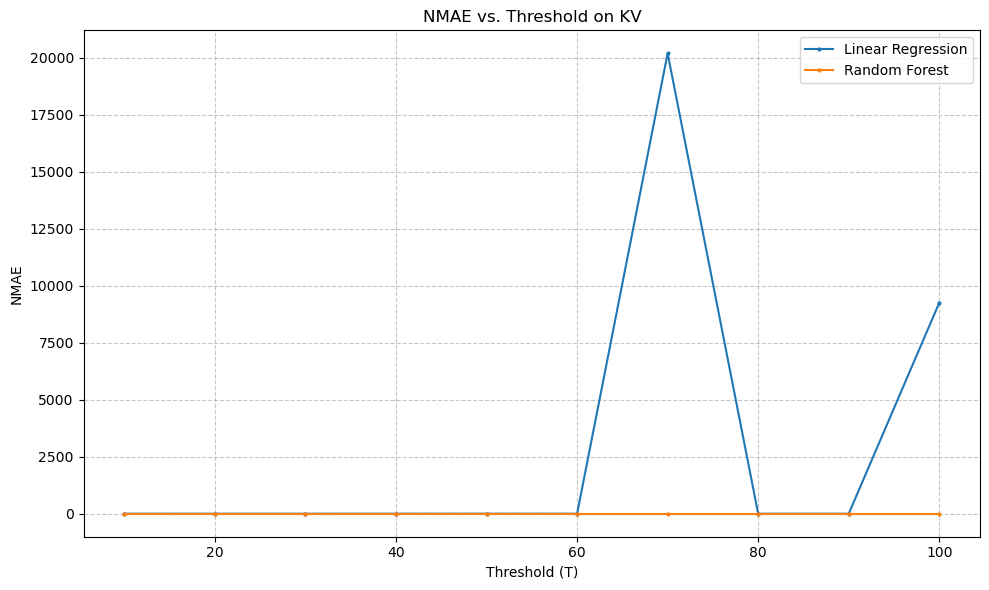

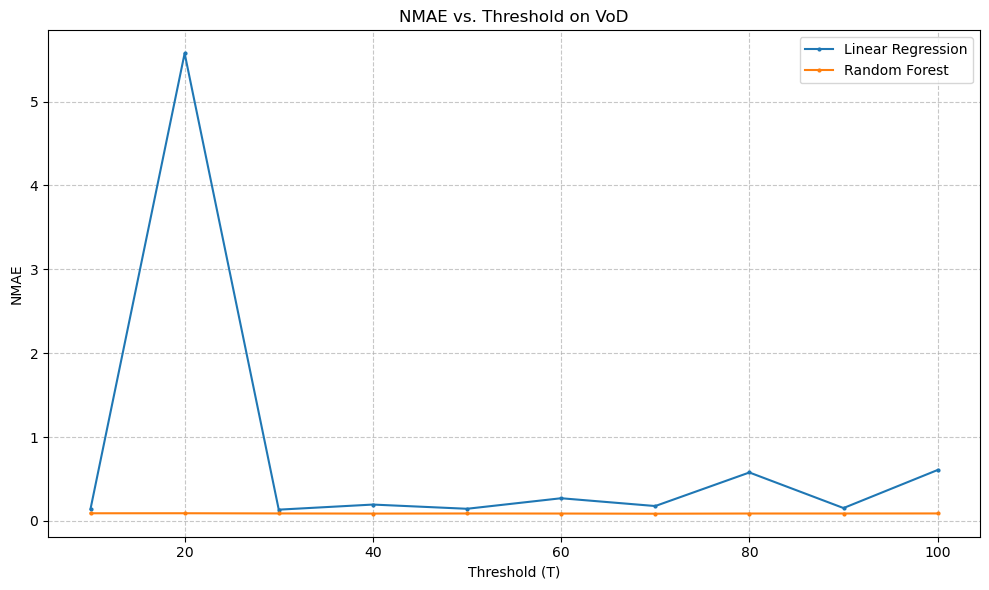

In [14]:
results_removed_df = pd.DataFrame(results_removed)
# Preview
print(results_removed_df.head())

# 2. Loop through each unique dataset name and plot its data
for dataset_name in results_removed_df['Dataset'].unique():
    # Plot outlier counts
    fig, ax = plt.subplots(figsize=(10, 6))
    # Filter the DataFrame for the current dataset
    dataset_data = results_removed_df[results_removed_df['Dataset'] == dataset_name]
    for model_name in results_removed_df['Model'].unique():
        model_data = dataset_data[results_removed_df['Model'] == model_name]
        # 3. Plot the threshold vs. num_outliers for this dataset
        ax.plot(
            model_data['Threshold'], # , 
            model_data['NMAE'], 
            label=model_name, 
            marker='.', # Add small markers for data points
            markersize=4,
            linestyle='-'
        )

        # 4. Customize the plot
        ax.set_title(f'NMAE vs. Threshold on {dataset_name}')
        ax.set_xlabel('Threshold (T)')
        ax.set_ylabel('NMAE')

        # 5. Add a legend to identify the datasets
        ax.legend()

        # Add a grid for better readability
        ax.grid(True, linestyle='--', alpha=0.7)

        # Ensure layout is tight
        plt.tight_layout()

        # 6. Save the plot to a file
        plt.savefig(f'outlier_removed_nmae_plot_{dataset_name}.png')

In [15]:
# In the previous step, use 10-fold cross-validation
nmae_scorer = make_scorer(compute_nmae, greater_is_better=False) 
# Create 10 datasets with outliers removed for T=10, 20, 30, ..., 80, 90, 100
threshold_range_step10 = range(10,101,10)
results_cross_validation = []
for dataset_name, matrics_target in datasets.items():
    print(f"\n Cross validation in dataset: {dataset_name}")
    matrices = matrics_target["matrices"]
    X5 = matrices["X5_Std_Col"]
    Y_target = matrics_target["target"]

    for T in threshold_range_step10:
        print (f'    - T: {T}')
        # Count samples where ANY feature has absolute value > T
        outlier_mask = np.any(np.abs(X5) > T, axis=1)
        valid_mask = ~outlier_mask
        
        X_filtered = X5[valid_mask]
        Y_filtered = Y_target[valid_mask]

        # X_train, X_test, y_train, y_test = train_test_split(
        #     X_filtered, Y_filtered, test_size=0.3, random_state=42
        # )
        for model_name, model in models.items():
            negative_nmae_scores = cross_val_score(
                                    model,      # The model to test
                                    X_filtered, # The *entire* feature set (e.g., "Training data" from Row 2)
                                    Y_filtered, # The *entire* target labels
                                    cv=10,      # Split this data into 10 folds"
                                    scoring=nmae_scorer, # "Use NMAE as the score"
                                    n_jobs=-1   # Run all 10 folds at the same time
                                )
            fold_nmae_scores = -negative_nmae_scores # Flip scores back to positive

            # Now you can get the mean and confidence interval
            mean_nmae = np.mean(fold_nmae_scores)
            std_dev = np.std(fold_nmae_scores)
            print(f"    Mean NMAE on dataset {model_name} over 10 folds: {mean_nmae:.3g}")

            # Confidence Interval
            t_ci = stats.t.interval(0.95,
                                df=len(fold_nmae_scores)-1,
                                loc=mean_nmae,
                                scale=stats.sem(fold_nmae_scores))
            ci_low, ci_high = t_ci[0], t_ci[1]

            results_cross_validation.append({
                "Dataset": dataset_name, # <-- Important new field
                "Model": model_name,
                "Threshold": T,
                "ci_low": ci_low,
                "ci_high": ci_high,
                "Mean NMAE": mean_nmae
            })
            


 Cross validation in dataset: KV
    - T: 10
    Mean NMAE on dataset Linear Regression over 10 folds: 0.189
    Mean NMAE on dataset Random Forest over 10 folds: 0.0181
    - T: 20
    Mean NMAE on dataset Linear Regression over 10 folds: 0.137
    Mean NMAE on dataset Random Forest over 10 folds: 0.0188
    - T: 30
    Mean NMAE on dataset Linear Regression over 10 folds: 0.12
    Mean NMAE on dataset Random Forest over 10 folds: 0.0192
    - T: 40
    Mean NMAE on dataset Linear Regression over 10 folds: 0.194
    Mean NMAE on dataset Random Forest over 10 folds: 0.019
    - T: 50
    Mean NMAE on dataset Linear Regression over 10 folds: 0.127
    Mean NMAE on dataset Random Forest over 10 folds: 0.019
    - T: 60
    Mean NMAE on dataset Linear Regression over 10 folds: 0.121
    Mean NMAE on dataset Random Forest over 10 folds: 0.0193
    - T: 70
    Mean NMAE on dataset Linear Regression over 10 folds: 4.52e+03
    Mean NMAE on dataset Random Forest over 10 folds: 0.0194
    - T

In [16]:
# Cross validation in dataset: KV
#     - T: 10
#     Mean NMAE and Standard deviation over 10 folds: 0.189, 0.326
#     Mean NMAE and Standard deviation over 10 folds: 0.019, 0.005
#     - T: 20
#     Mean NMAE and Standard deviation over 10 folds: 0.137, 0.198
#     Mean NMAE and Standard deviation over 10 folds: 0.020, 0.003
#     - T: 30
#     Mean NMAE and Standard deviation over 10 folds: 0.120, 0.133
#     Mean NMAE and Standard deviation over 10 folds: 0.021, 0.004
#     - T: 40
#     Mean NMAE and Standard deviation over 10 folds: 0.194, 0.258
#     Mean NMAE and Standard deviation over 10 folds: 0.021, 0.005
#     - T: 50
#     Mean NMAE and Standard deviation over 10 folds: 0.127, 0.084
#     Mean NMAE and Standard deviation over 10 folds: 0.020, 0.004
#     - T: 60
#     Mean NMAE and Standard deviation over 10 folds: 0.121, 0.071
#     Mean NMAE and Standard deviation over 10 folds: 0.021, 0.004
#     - T: 70
#     Mean NMAE and Standard deviation over 10 folds: 4515.869, 9122.468
#     Mean NMAE and Standard deviation over 10 folds: 0.021, 0.004
#     - T: 80
#     Mean NMAE and Standard deviation over 10 folds: 4577.567, 9240.312
#     Mean NMAE and Standard deviation over 10 folds: 0.021, 0.004
#     - T: 90
#     Mean NMAE and Standard deviation over 10 folds: 4498.563, 9024.417
#     Mean NMAE and Standard deviation over 10 folds: 0.021, 0.004
#     - T: 100
#     Mean NMAE and Standard deviation over 10 folds: 14502.401, 30199.713
#     Mean NMAE and Standard deviation over 10 folds: 0.022, 0.006

#  Cross validation in dataset: VoD
#     - T: 10
#     Mean NMAE and Standard deviation over 10 folds: 0.234, 0.047
#     Mean NMAE and Standard deviation over 10 folds: 0.113, 0.035
#     - T: 20
#     Mean NMAE and Standard deviation over 10 folds: 3.709, 6.864
#     Mean NMAE and Standard deviation over 10 folds: 0.112, 0.040
#     - T: 30
#     Mean NMAE and Standard deviation over 10 folds: 5.670, 11.234
#     Mean NMAE and Standard deviation over 10 folds: 0.111, 0.040
#     - T: 40
#     Mean NMAE and Standard deviation over 10 folds: 5.005, 9.044
#     Mean NMAE and Standard deviation over 10 folds: 0.111, 0.039
#     - T: 50
#     Mean NMAE and Standard deviation over 10 folds: 5.680, 9.283
#     Mean NMAE and Standard deviation over 10 folds: 0.112, 0.038
#     - T: 60
#     Mean NMAE and Standard deviation over 10 folds: 4.911, 9.259
#     Mean NMAE and Standard deviation over 10 folds: 0.113, 0.039
#     - T: 70
#     Mean NMAE and Standard deviation over 10 folds: 4.941, 9.284
#     Mean NMAE and Standard deviation over 10 folds: 0.112, 0.039
#     - T: 80
#     Mean NMAE and Standard deviation over 10 folds: 4.721, 9.015
#     Mean NMAE and Standard deviation over 10 folds: 0.111, 0.039
#     - T: 90
#     Mean NMAE and Standard deviation over 10 folds: 5.041, 9.065
#     Mean NMAE and Standard deviation over 10 folds: 0.111, 0.039
#     - T: 100
#     Mean NMAE and Standard deviation over 10 folds: 4.988, 9.064
#     Mean NMAE and Standard deviation over 10 folds: 0.111, 0.039

  Dataset              Model  Threshold    ci_low   ci_high  Mean NMAE
0      KV  Linear Regression         10 -0.056365  0.434829   0.189232
1      KV      Random Forest         10  0.016639  0.019614   0.018127
2      KV  Linear Regression         20 -0.012209  0.286283   0.137037
3      KV      Random Forest         20  0.017399  0.020286   0.018843
4      KV  Linear Regression         30  0.019777  0.219850   0.119813


C:\Users\Noether\AppData\Local\Temp\ipykernel_22748\1108995642.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  model_data = dataset_data[results_cross_validation_df['Model'] == model_name]


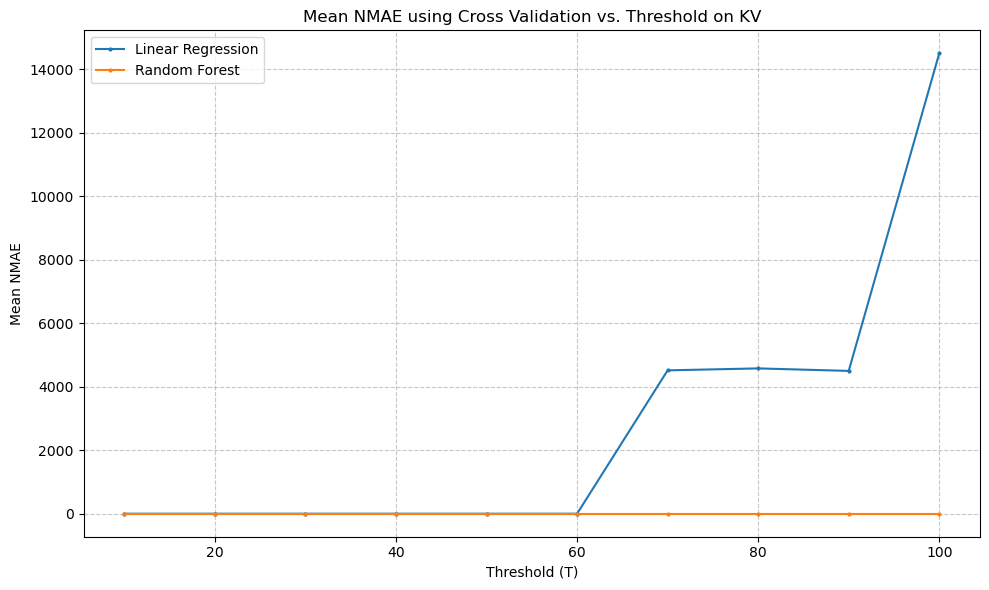

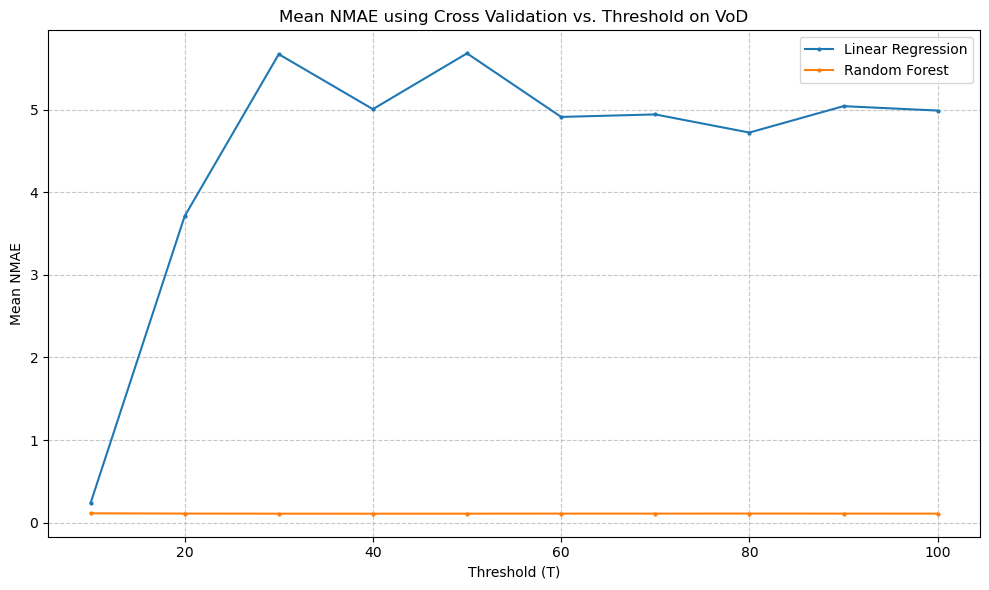

: 

In [ ]:
results_cross_validation_df = pd.DataFrame(results_cross_validation)
# Preview
print(results_cross_validation_df.head())

# 2. Loop through each unique dataset name and plot its data
for dataset_name in results_cross_validation_df['Dataset'].unique():
    # Plot outlier counts
    fig, ax = plt.subplots(figsize=(10, 6))
    # Filter the DataFrame for the current dataset
    dataset_data = results_cross_validation_df[results_cross_validation_df['Dataset'] == dataset_name]
    for model_name in results_cross_validation_df['Model'].unique():
        model_data = dataset_data[results_cross_validation_df['Model'] == model_name]
        # 3. Plot the threshold vs. mean nmae for this dataset
        ax.plot(
            model_data['Threshold'], # , 
            model_data['Mean NMAE'], 
            label=model_name, 
            marker='.', # Add small markers for data points
            markersize=4,
            linestyle='-'
        )

        # 4. Customize the plot
        ax.set_title(f'Mean NMAE using Cross Validation vs. Threshold on {dataset_name}')
        ax.set_xlabel('Threshold (T)')
        ax.set_ylabel('Mean NMAE')

        # 5. Add a legend to identify the datasets
        ax.legend()

        # Add a grid for better readability
        ax.grid(True, linestyle='--', alpha=0.7)

        # Ensure layout is tight
        plt.tight_layout()

        # 6. Save the plot to a file
        plt.savefig(f'outlier_removed_nmae_cv_plot_{dataset_name}.png')

  Dataset              Model  Threshold    ci_low   ci_high  Mean NMAE
0      KV  Linear Regression         10 -0.056365  0.434829   0.189232
1      KV      Random Forest         10  0.016639  0.019614   0.018127
2      KV  Linear Regression         20 -0.012209  0.286283   0.137037
3      KV      Random Forest         20  0.017399  0.020286   0.018843
4      KV  Linear Regression         30  0.019777  0.219850   0.119813


C:\Users\Noether\AppData\Local\Temp\ipykernel_22748\874135982.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  model_data = dataset_data[results_cross_validation_df['Model'] == model_name]


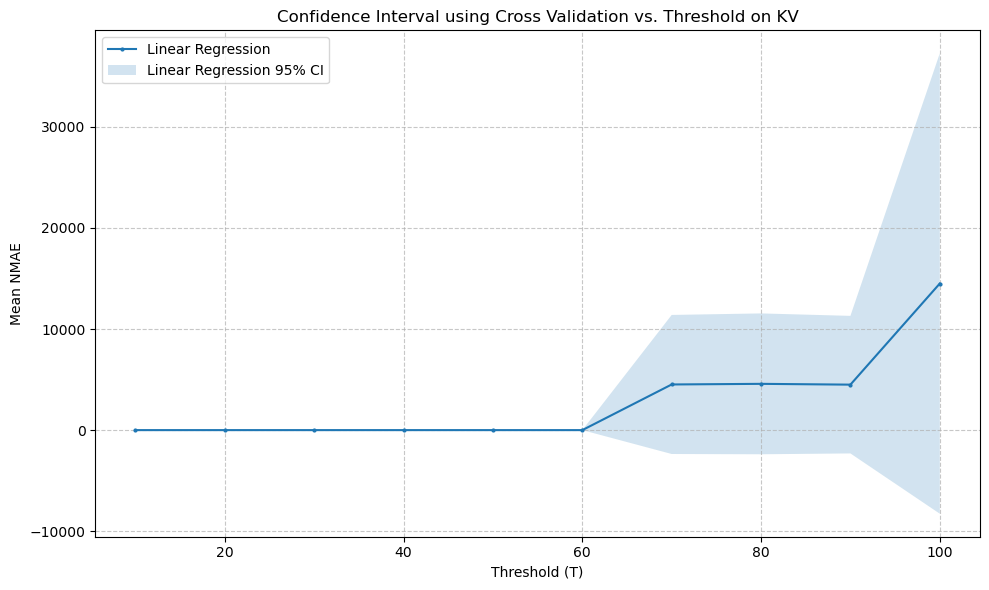

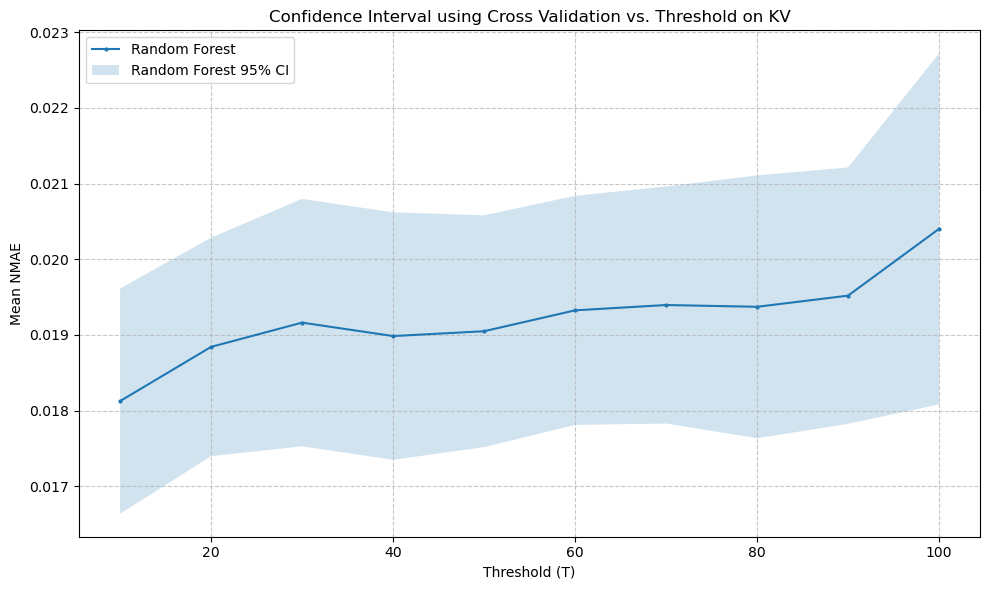

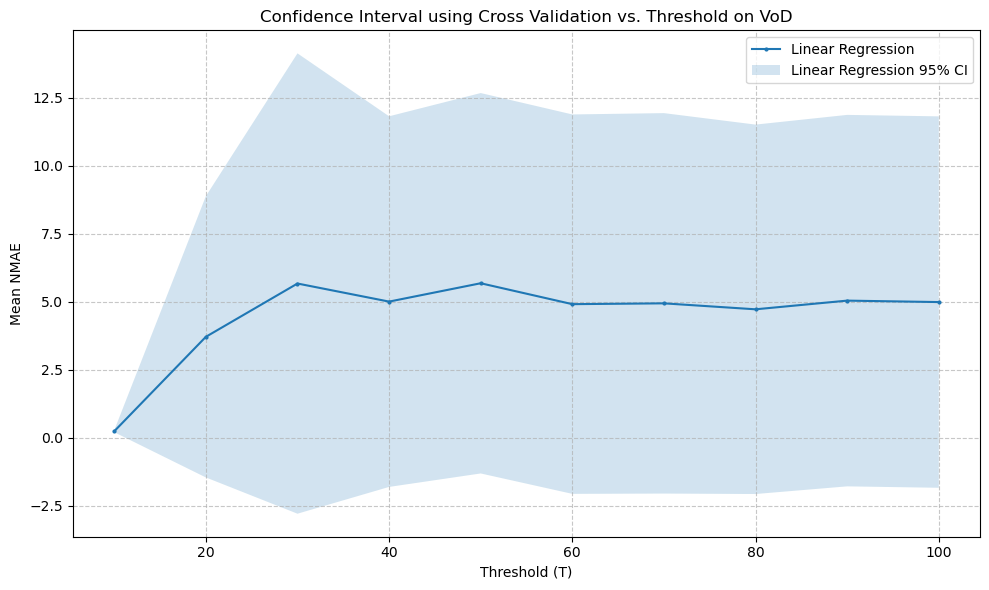

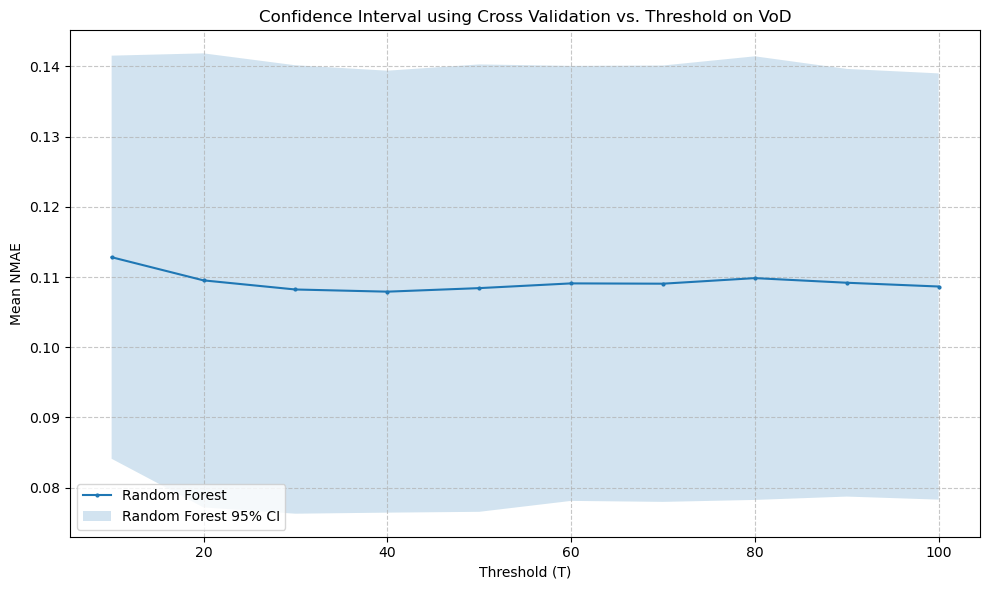

: 

In [ ]:
results_cross_validation_df = pd.DataFrame(results_cross_validation)
# Preview
print(results_cross_validation_df.head())

# 2. Loop through each unique dataset name and plot its data
for dataset_name in results_cross_validation_df['Dataset'].unique():
    
    # Filter the DataFrame for the current dataset
    dataset_data = results_cross_validation_df[results_cross_validation_df['Dataset'] == dataset_name]
    for model_name in results_cross_validation_df['Model'].unique():
        # Plot outlier counts
        fig, ax = plt.subplots(figsize=(10, 6))
        model_data = dataset_data[results_cross_validation_df['Model'] == model_name]

        # 3. Plot the threshold vs. num_outliers for this dataset
        ax.plot(
            model_data['Threshold'], # , 
            model_data['Mean NMAE'], 
            label=model_name, 
            marker='.', # Add small markers for data points
            markersize=4,
            linestyle='-'
        )
        ax.fill_between(
            model_data['Threshold'],
            model_data['ci_low'],
            model_data['ci_high'],
            alpha=0.2,
            label=f"{model_name} 95% CI"
        )
        # 4. Customize the plot
        ax.set_title(f'95% Confidence Interval using Cross Validation vs. Threshold on {dataset_name}')
        ax.set_xlabel('Threshold (T)')
        ax.set_ylabel('Mean NMAE')

        # 5. Add a legend to identify the datasets
        ax.legend()

        # Add a grid for better readability
        ax.grid(True, linestyle='--', alpha=0.7)

        # Ensure layout is tight
        plt.tight_layout()

        # 6. Save the plot to a file
        plt.savefig(f'outlier_removed_nmae_cv_plot_{dataset_name}_{model_name}.png')